### Importing liberaries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
c_housing = pd.read_csv("housing.csv")

In [3]:
c_housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


<AxesSubplot:>

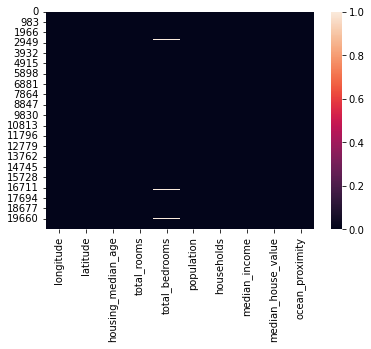

In [19]:
sns.heatmap(c_housing.isnull())

In [4]:
c_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Since This is a regression problem, we will convert "ocean proximity" into numerical category. 
There are twe ways to handle the missing data in "total bedrooms", we may drop the column or fill the "nan" values with mean or median.

In [8]:
c_housing["ocean_proximity"].nunique()

5

In [5]:
c_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
c_housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

we have 5 categories in "ocean proximity", with only 5 instances in Island category.

In [10]:
c_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


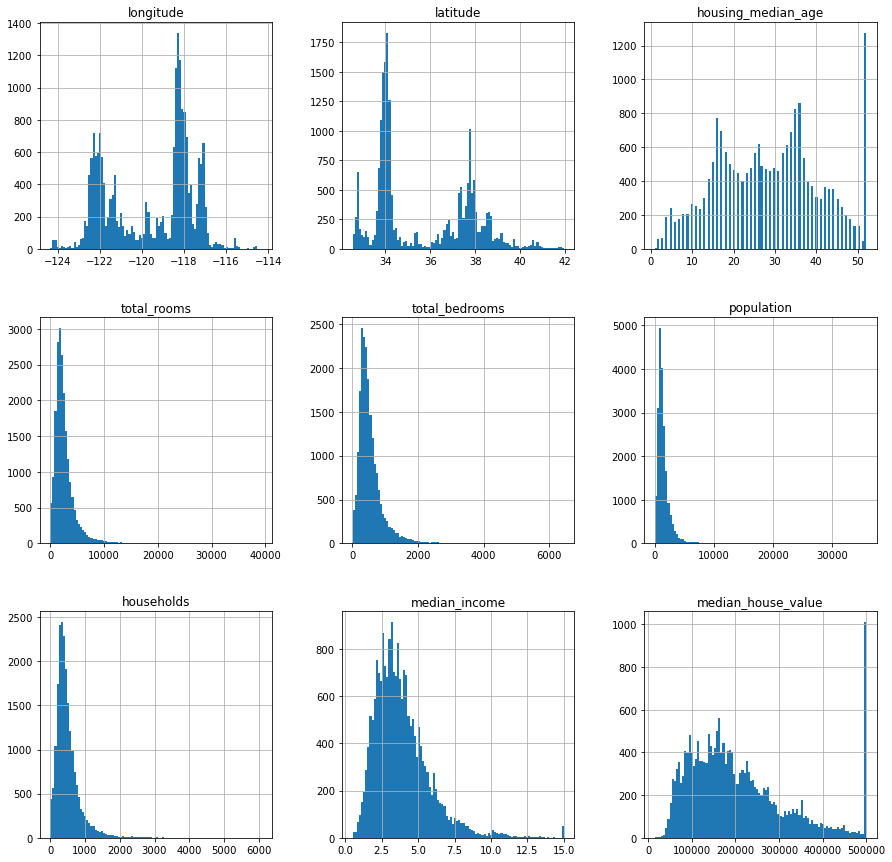

In [15]:
#getting some insights 
c_housing.hist(bins=100,figsize=(15,15))
plt.show()

There are some outliers "housing_median_age" and "median_house_value
" which might mean that all the values over the last categories might be stacked in the last ones.

 ###### categorizing median income 

In [29]:
c_housing["income"]=np.ceil(c_housing["median_income"]/1.5)
c_housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
14351,-117.21,32.75,27.0,2072.0,534.0,1118.0,510.0,2.8043,262100.0,NEAR OCEAN,2.0
5096,-118.30,33.97,42.0,944.0,200.0,567.0,190.0,2.6311,124100.0,<1H OCEAN,2.0
17104,-122.23,37.45,29.0,1617.0,235.0,758.0,246.0,7.7932,469900.0,NEAR OCEAN,6.0
6813,-118.07,34.10,28.0,676.0,177.0,543.0,185.0,3.2361,187500.0,<1H OCEAN,3.0
1734,-122.35,37.97,31.0,2892.0,685.0,2104.0,641.0,3.2188,113800.0,NEAR BAY,3.0


In [30]:
c_housing["income"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income, dtype: int64

In [31]:
c_housing["income"].where(c_housing['income']< 5,other=5.0, inplace = True )

In [32]:
c_housing["income"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income, dtype: int64

In [35]:
# to create stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size= 0.2, random_state=222)
for train_index, test_index in split.split(c_housing,c_housing["income"]):
    train_set = c_housing.loc[train_index]
    test_set = c_housing.loc[test_index]

In [36]:
# random sampling
from sklearn.model_selection import train_test_split
r_train_set,r_test_set = train_test_split(c_housing, test_size=0.2, random_state=222)

In [38]:
# dropping income category we created
for items in (train_set, test_set):
    items.drop("income", axis= 1, inplace = True)

In [39]:
housing = train_set.copy()

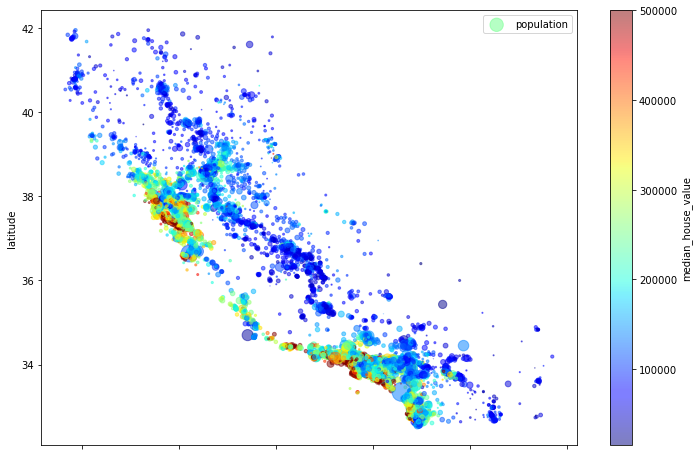

In [47]:
housing.plot(kind= "scatter", x = "longitude", y = "latitude" ,alpha=0.5 , s= housing["population"]/100,label="population",figsize=(12,8),c = "median_house_value",cmap=plt.get_cmap("jet"))
plt.legend()

In [50]:
corr=housing.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924139,-0.105179,0.044263,0.068649,0.097948,0.055404,-0.013976,-0.043890
latitude,-0.924139,1.000000,0.005916,-0.034435,-0.064957,-0.104821,-0.069607,-0.082474,-0.147400
housing_median_age,-0.105179,0.005916,1.000000,-0.359274,-0.317019,-0.292084,-0.299527,-0.115645,0.112427
total_rooms,0.044263,-0.034435,-0.359274,1.000000,0.930651,0.856802,0.919466,0.191195,0.127672
total_bedrooms,0.068649,-0.064957,-0.317019,0.930651,1.000000,0.876563,0.980542,-0.014070,0.046315
population,0.097948,-0.104821,-0.292084,0.856802,0.876563,1.000000,0.905031,-0.000140,-0.029256
households,0.055404,-0.069607,-0.299527,0.919466,0.980542,0.905031,1.000000,0.007449,0.061817
median_income,-0.013976,-0.082474,-0.115645,0.191195,-0.014070,-0.000140,0.007449,1.000000,0.685246
median_house_value,-0.043890,-0.147400,0.112427,0.127672,0.046315,-0.029256,0.061817,0.685246,1.000000


In [51]:
#looking for correlation. The correlation coefficient ranges from –1 to 1.
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685246
total_rooms           0.127672
housing_median_age    0.112427
households            0.061817
total_bedrooms        0.046315
population           -0.029256
longitude            -0.043890
latitude             -0.147400
Name: median_house_value, dtype: float64

This showes that the most coorelated factors with house value is income.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

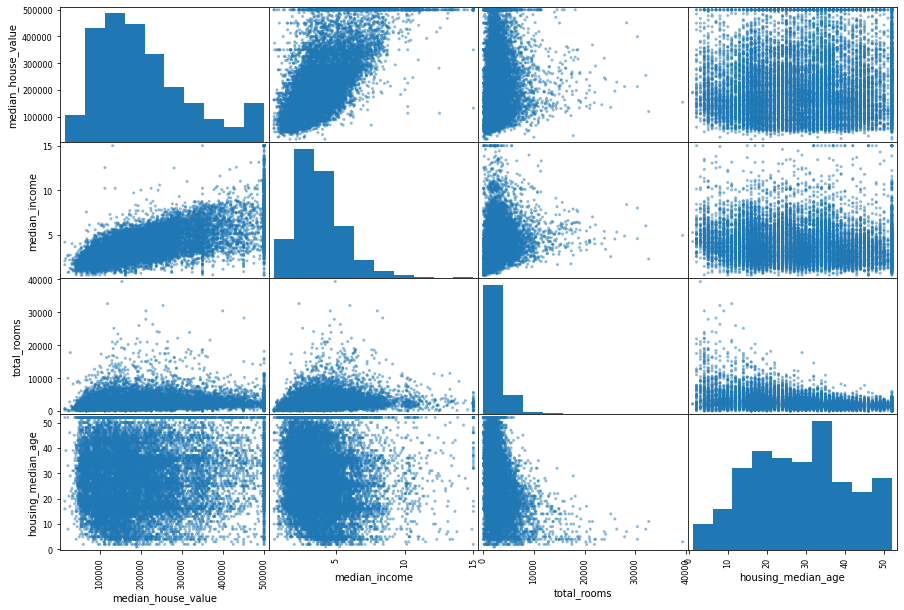

In [54]:
#deep insights in some correlations
from pandas.plotting import scatter_matrix 
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15, 10))

##### creating some other features

In [55]:
#rooms per household
#population_per_household
#bedrooms per room
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]




In [56]:
corr_new = housing.corr()
corr_new["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685246
rooms_per_household         0.146387
total_rooms                 0.127672
housing_median_age          0.112427
households                  0.061817
total_bedrooms              0.046315
population_per_household   -0.022792
population                 -0.029256
longitude                  -0.043890
latitude                   -0.147400
bedrooms_per_room          -0.250185
Name: median_house_value, dtype: float64

#### preparing dat for ML

In [57]:
housing_train = train_set.drop("median_house_value", axis=1)
housing_train_lable= train_set['median_house_value'].copy()

calculaing madian using imputer sklearn

In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [68]:
housing_n = housing_train.drop("ocean_proximity", axis=1)
imputer.fit(housing_n)

KeyError: "['ocean_proximity'] not found in axis"

In [62]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2125.     ,  434.     ,
       1165.     ,  408.     ,    3.53895])

In [70]:
X1= imputer.transform(huosing_n) # typo

In [71]:
housing_train= pd.DataFrame(X1,columns=huosing_n.columns)#typo

In [72]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.12,33.81,36.0,1774.0,299.0,784.0,298.0,5.0447
1,-118.05,33.84,21.0,4890.0,653.0,2295.0,654.0,6.9830
2,-117.08,33.12,33.0,674.0,208.0,565.0,188.0,1.8750
3,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750
4,-118.05,33.72,17.0,1875.0,472.0,900.0,406.0,5.2589


<AxesSubplot:>

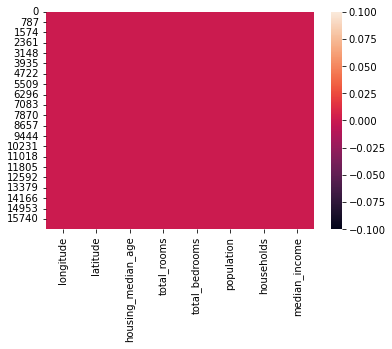

In [73]:
sns.heatmap(housing_train.isnull())

##### handling categorical values

In [ ]:
#pandas way factorize() method
#housing_ocean cat = housing["ocean_proximity"]
#housing_ocean_encoded, housing_categories = housing_ocean_cat.factorize()


In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ocean_cat = housing["ocean_proximity"]
ocean_cat_encoded = encoder.fit_transform(ocean_cat)
ocean_cat_encoded

array([0, 0, 0, ..., 4, 3, 4])

In [77]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_ocean_1hot = encoder.fit_transform(ocean_cat_encoded.reshape(-1,1))

In [78]:
housing_ocean_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [80]:
# to return the sparse matrix of onehot encoder which is a 2d array to 1d array
housing_ocean_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [82]:
#create pipline of custom transformations
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
       
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]



In [84]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs_df = pd.DataFrame(housing_extra_attribs, columns= list(housing.columns)+["rooms_per_household","population_per_household"])

In [86]:
housing_extra_attribs_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-118.12,33.81,36.0,1774.0,299.0,784.0,298.0,5.0447,249200.0,<1H OCEAN,5.95302,0.168546,2.630872,5.95302,2.630872
1,-118.05,33.84,21.0,4890.0,653.0,2295.0,654.0,6.983,329700.0,<1H OCEAN,7.477064,0.133538,3.509174,7.477064,3.509174


In [89]:
#create the pipline out of that
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(huosing_n) # typo
housing_num_tr

array([[ 0.72003833, -0.85151011,  0.59111969, ...,  0.20497723,
        -0.04083227, -0.68391712],
       [ 0.7549294 , -0.83748043, -0.60154005, ...,  0.80364091,
         0.03488945, -1.21414512],
       [ 1.23841999, -1.17419267,  0.35258774, ..., -0.72516906,
        -0.0085498 ,  1.4374246 ],
       ...,
       [ 0.96926028, -1.01051311, -1.95322109, ...,  1.23990386,
         0.0024323 , -1.10523573],
       [-1.31859725,  1.23891169,  0.51160904, ...,  0.6292655 ,
        -0.00329256, -0.73815503],
       [-1.42327047,  0.9536416 ,  1.06818358, ...,  0.11657066,
         0.00489006, -0.37935116]])

In [95]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X ,y=None):
        return self #nothing to return
    def transform(self,X,y=None):
        return X[self.attribute_names].values

In [96]:
#complete pipeline
num_attribs = list(huosing_n.columns)#typo
cat_attribs= ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="madian")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("selector",DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [97]:
#feature union
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [100]:
housing_prepered = full_pipeline.fit_transform(housing_train)


ValueError: Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant']  got strategy=madian

In [ ]:



encoder = LabelBinarizer()
housing_extra_attribs_df["housing_cat_1hot"] = encoder.fit_transform(housing_cat)

jobs_encoder = 
jobs_encoder.fit(data['Profession'])

transformed = jobs_encoder.transform(data['Profession'])
ohe_df = pd.DataFrame(transformed)
data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)

In [102]:
from sklearn.preprocessing import LabelBinarizer
ocean_encoder = LabelBinarizer()
ocean_encoder.fit(housing_extra_attribs_df["ocean_proximity"])
ocean_transformed = ocean_encoder.transform(housing_extra_attribs_df["ocean_proximity"])

In [103]:
binarized_df = pd.DataFrame(ocean_transformed)

In [104]:
final_housing = pd.concat([housing_extra_attribs_df, binarized_df], axis=1).drop(['ocean_proximity'], axis=1)

In [106]:
final_housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household,0,1,2,3,4
0,-118.12,33.81,36.0,1774.0,299.0,784.0,298.0,5.0447,249200.0,5.95302,0.168546,2.630872,5.95302,2.630872,1,0,0,0,0
1,-118.05,33.84,21.0,4890.0,653.0,2295.0,654.0,6.983,329700.0,7.477064,0.133538,3.509174,7.477064,3.509174,1,0,0,0,0


In [110]:
o_encoder = OneHotEncoder()
transformed = o_encoder.fit_transform(housing_extra_attribs_df['ocean_proximity'].to_numpy().reshape(-1, 1))
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=o_encoder.get_feature_names())
#concat with original data
data = pd.concat([housing_extra_attribs_df, ohe_df], axis=1).drop(['ocean_proximity'], axis=1)

C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: Shape of passed values is (16512, 1), indices imply (16512, 5)

In [111]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_train = pd.DataFrame(OH_encoder.fit_transform(housing_extra_attribs_df["ocean_proximity"]).toarray())

# One-hot encoding removed index; put it back
#OH_cols_train.index = X_train.index
#OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
#numeric_X_train = X_train.drop(low_cardinality_cols, axis=1)
#numeric_X_valid = X_valid.drop(low_cardinality_cols, axis=1)
data = pd.concat([housing_extra_attribs_df, ohe_df], axis=1).drop(['ocean_proximity'], axis=1)
# Add one-hot encoded columns to numerical features
#new_X_train = pd.concat([numeric_X_train, OH_cols_train], axis=1)
#new_X_valid = pd.concat([numeric_X_valid, OH_cols_valid], axis=1)
#print(new_X_train)

ValueError: Expected 2D array, got 1D array instead:
array=['<1H OCEAN' '<1H OCEAN' '<1H OCEAN' ... 'NEAR OCEAN' 'NEAR BAY'
 'NEAR OCEAN'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.